# CS 414: Artificial Intelligence: Naive Bayes Assignment

### CS - 4101

> BE SURE TO HAVE **matplotlib**, **pandas**, **scikit-learn**, **seaborn** installed.

---

##### Leader:

- Magbojos, Jenloke

##### Members:

- Abanilla, Drexler
- Cruzat, Seth Arkin
- De Guzman, Joshua John
- De Jesus, James Moris
- Jalapan, John Pol
- Mendoza, Kate Trixie
- Pablo, Rianne Joy

In [2134]:
import math

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Used in Naive Bayes
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2135]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2136]:
# Race column is removed since it is not involve in the measurement of Naive Bayes
df = df.drop('race/ethnicity', axis=1)

In [2137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   parental level of education  1000 non-null   object
 2   lunch                        1000 non-null   object
 3   test preparation course      1000 non-null   object
 4   math score                   1000 non-null   int64 
 5   reading score                1000 non-null   int64 
 6   writing score                1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


In [2138]:
# Removing of Spaces in Column Names

df = df.rename(columns={'test preparation course': 'test_preparation_course'})
df = df.rename(columns={'math score': 'math_score'})
df = df.rename(columns={'reading score': 'reading_score'})
df = df.rename(columns={'writing score': 'writing_score'})
df = df.rename(columns={'parental level of education': 'parental_level_of_education'})

In [2139]:
print(f'The unique values of lunch column is {df.lunch.unique()}')
print(f'The unique values of parental_level_of_education column is {df.parental_level_of_education.unique()}')
print(f'The uniqie values of testpreparation_course column is {df.test_preparation_course.unique()}') 

The unique values of lunch column is ['standard' 'free/reduced']
The unique values of parental_level_of_education column is ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
The uniqie values of testpreparation_course column is ['none' 'completed']


# DATA VISUALIZATION

<Axes: xlabel='count', ylabel='gender'>

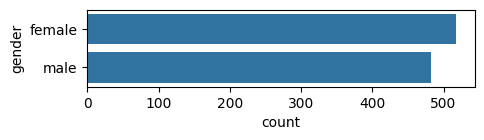

In [2140]:
#Count Plot of Gender
plt.figure(figsize = (5,1))
sns.countplot(df.gender)

Text(0.5, 1.0, 'Frequency Distribution of Parental Level of Education')

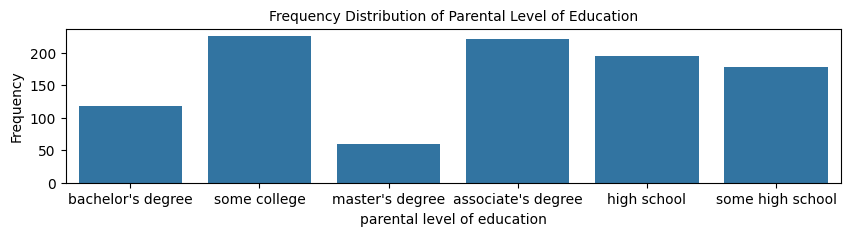

In [2141]:
#Frequency Distribution of Parental Level of Education
plt.figure(figsize=(10, 2))
sns.countplot(x = 'parental_level_of_education', data = df)
plt.xlabel(xlabel = 'parental level of education', size = 10)
plt.ylabel(ylabel = 'Frequency', size = 10)
plt.title(label = 'Frequency Distribution of Parental Level of Education', size = 10)


Text(0.5, 1.0, 'Proportion Distribution of Parental Level of Education')

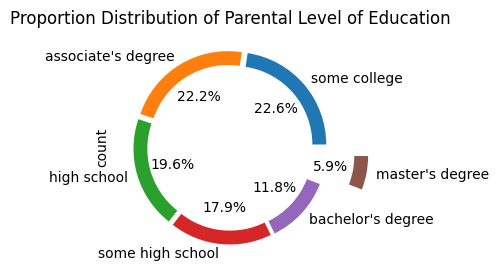

In [2142]:
#Proportion Distribution of Parental Level of Education
df['parental_level_of_education'].value_counts().plot(kind = 'pie', explode = [.05,.05,.05,.05,.05, 0.5], autopct = '%3.1f%%', 
                                                      wedgeprops = dict(width=0.15), figsize = [10, 3])
plt.title(label = 'Proportion Distribution of Parental Level of Education')

<Axes: xlabel='count', ylabel='lunch'>

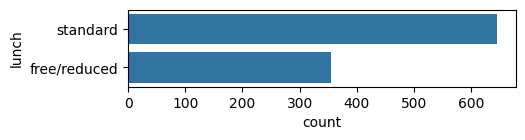

In [2143]:
#Count Plot of Lunch Type
plt.figure(figsize = (5,1))
sns.countplot(df.lunch)

<Axes: xlabel='count', ylabel='test_preparation_course'>

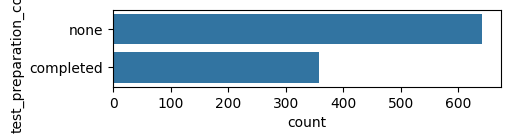

In [2144]:
#Count Plot of Test Preparation
plt.figure(figsize = (5,1))
sns.countplot(df['test_preparation_course'])

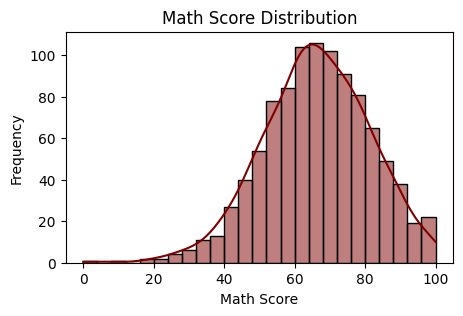

In [2145]:
#Histogram Plot of Math Score
plt.figure(figsize=(5, 3))

sns.histplot(df["math_score"],kde=True,color="maroon")
plt.title('Math Score Distribution')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

plt.show()

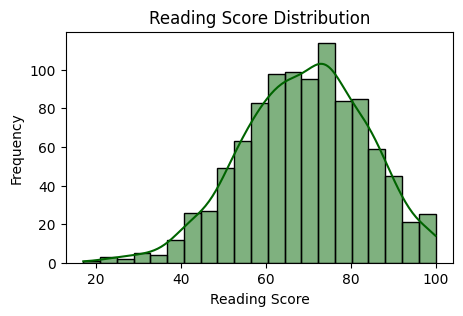

In [2146]:
#Histogram Plot of Reading Score
plt.figure(figsize=(5, 3))

sns.histplot(df["reading_score"],kde=True,color="darkgreen")
plt.title('Reading Score Distribution')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')

plt.show()

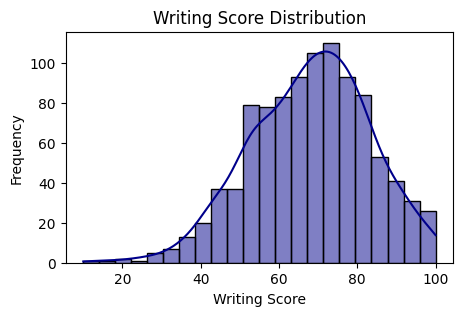

In [2147]:
#Histogram Plot of Writing Score
plt.figure(figsize=(5, 3))

sns.histplot(df["writing_score"],kde=True,color="darkblue")
plt.title('Writing Score Distribution')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')

plt.show()

# NAIVE BAYES MODEL

In [2148]:
# For the Naive Bayes to have 3 classes, scores column is divided into three, Above Average, Average, Below Average

math_below_average = math.floor(df['math_score'].quantile(0.3))
math_above_average = math.floor(df['math_score'].quantile(0.6))
print('Math Model')
print(f'Based on the math column the third decile is {math_below_average}')
print(f'Based on the math column the sixth decile is {math_above_average}')

reading_below_average = math.floor(df['reading_score'].quantile(0.3))
reading_above_average = math.floor(df['reading_score'].quantile(0.6))
print('Reading Model')
print(f'Based on the math column the third decile is {math_below_average}')
print(f'Based on the math column the sixth decile is {math_above_average}')


writing_below_average = math.floor(df['writing_score'].quantile(0.3))
writing_above_average = math.floor(df['writing_score'].quantile(0.6))
print('Writing Model')
print(f'Based on the math column the third decile is {writing_below_average}')
print(f'Based on the math column the sixth decile is {writing_above_average}')

Math Model
Based on the math column the third decile is 59
Based on the math column the sixth decile is 70
Reading Model
Based on the math column the third decile is 59
Based on the math column the sixth decile is 70
Writing Model
Based on the math column the third decile is 60
Based on the math column the sixth decile is 73


In [2149]:
# Changing the score columns to be either just Passed or Failed based on their scores

df['math_score'] = df['math_score'].apply(lambda x: 'Above Average' if x >= math_above_average else 'Average' if x >= math_below_average else 'Below Average')
df['reading_score'] = df['reading_score'].apply(lambda x: 'Above Average' if x >= reading_above_average else 'Average' if x >= reading_below_average else 'Below Average')
df['writing_score'] = df['writing_score'].apply(lambda x: 'Above Average' if x >= writing_above_average else 'Average' if x >= writing_below_average else 'Below Average')
df.head()

,gender,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,bachelor's degree,standard,none,Above Average,Average,Above Average
1,female,some college,standard,completed,Average,Above Average,Above Average
2,female,master's degree,standard,none,Above Average,Above Average,Above Average
3,male,associate's degree,free/reduced,none,Below Average,Below Average,Below Average
4,male,some college,standard,none,Above Average,Above Average,Above Average


In [2150]:
# Preparationg for Testing

# Feature Matrix
feature_matrix_features = ['gender', 'parental_level_of_education','lunch','test_preparation_course']
feature_matrix = pd.get_dummies(df[[*feature_matrix_features]], drop_first = True)

# Reponse Vector 
math_response_vetor = df['math_score']
reading_response_vetor = df['reading_score']
writing_response_vetor = df['writing_score']

test_population = 0.2 # 20%

In [2151]:
#MATH MODEL

# Splitting Data
math_x_train, math_x_test, math_y_train, math_y_test = train_test_split(feature_matrix, math_response_vetor, test_size = test_population, random_state = 35)

math_model = GaussianNB()
math_model.fit(math_x_train, math_y_train)

# Model Training
math_train_prediction = math_model.predict(math_x_train)
math_train_accuracy = metrics.accuracy_score(math_y_train, math_train_prediction)
print(f'Based on training the math model accuracy is {round(math_train_accuracy*100, 2)}%')

# Model Checking
math_test_prediction = math_model.predict(math_x_test)
math_test_accuracy = metrics.accuracy_score(math_y_test, math_test_prediction)
print(f'Based on testing the math model accuracy is {round(math_test_accuracy*100, 2)}%')

# Classification Report
math_classification_report = metrics.classification_report(math_y_test, math_test_prediction)
print(math_classification_report)

Based on training the math model accuracy is 45.62%
Based on testing the math model accuracy is 50.0%
               precision    recall  f1-score   support

Above Average       0.61      0.66      0.64        86
      Average       0.32      0.31      0.31        62
Below Average       0.51      0.46      0.48        52

     accuracy                           0.50       200
    macro avg       0.48      0.48      0.48       200
 weighted avg       0.49      0.50      0.50       200



In [2152]:
#READING MODEL

# Splitting Data
reading_x_train, reading_x_test, reading_y_train, reading_y_test = train_test_split(feature_matrix, reading_response_vetor, test_size = test_population, random_state = 35)

reading_model = GaussianNB()
reading_model.fit(reading_x_train, reading_y_train)

# Model Training
reading_train_prediction = reading_model.predict(reading_x_train)
reading_train_accuracy = metrics.accuracy_score(reading_y_train, reading_train_prediction)
print(f'Based on training the reading model accuracy is {round(reading_train_accuracy*100, 2)}%')

# Model Checking
reading_test_prediction = reading_model.predict(reading_x_test)
reading_test_accuracy = metrics.accuracy_score(reading_y_test, reading_test_prediction)
print(f'Based on testing the reading model accuracy is {round(reading_test_accuracy*100, 2)}%')

# Classification Report
reading_classification_report = metrics.classification_report(reading_y_test, reading_test_prediction)
print(reading_classification_report)

Based on training the reading model accuracy is 48.25%
Based on testing the reading model accuracy is 46.5%
               precision    recall  f1-score   support

Above Average       0.65      0.61      0.63        90
      Average       0.16      0.05      0.08        60
Below Average       0.36      0.70      0.48        50

     accuracy                           0.47       200
    macro avg       0.39      0.45      0.39       200
 weighted avg       0.43      0.47      0.43       200



In [2153]:
#WRITING MODEL

# Splitting Data
writing_x_train, writing_x_test, writing_y_train, writing_y_test = train_test_split(feature_matrix, writing_response_vetor, test_size = test_population, random_state = 35)

writing_model = GaussianNB()
writing_model.fit(writing_x_train, writing_y_train)

# Model Training
writing_train_prediction = writing_model.predict(writing_x_train)
writing_train_accuracy = metrics.accuracy_score(writing_y_train, writing_train_prediction)
print(f'Based on training the writing model accuracy is {round(writing_train_accuracy * 100, 2)}%')

# Model Checking
writing_test_prediction = writing_model.predict(writing_x_test)
writing_test_accuracy = metrics.accuracy_score(writing_y_test, writing_test_prediction)
print(f'Based on testing the writing model accuracy is {round(writing_test_accuracy * 100, 2)}%')

# Classification Report
writing_classification_report = metrics.classification_report(writing_y_test, writing_test_prediction)
print(writing_classification_report)

Based on training the writing model accuracy is 50.75%
Based on testing the writing model accuracy is 47.0%
               precision    recall  f1-score   support

Above Average       0.64      0.69      0.66        89
      Average       0.23      0.05      0.08        66
Below Average       0.33      0.67      0.44        45

     accuracy                           0.47       200
    macro avg       0.40      0.47      0.39       200
 weighted avg       0.43      0.47      0.42       200



- The testing of this Naive Bayes Classification Application is done at model checking par using sci kit's accuracy score analyzer based on the given prediction from x and y training data then checked on x and y test data.